In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/inventory_data.csv')

In [6]:
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,0ddc2379-adba-4fb0-aa97-19fcafc738a1,0.35,3.0,-0.02885
3,2022-03-01 09:00:00,146d5e4d-992a-4db7-904d-b8af359b80a7,0.48,1.0,-0.02885
4,2022-03-01 09:00:00,14736243-d346-438f-9535-d80fcb9f3882,0.67,6.0,-0.02885


In [7]:
df.sample(5)

,timestamp,product_id,estimated_stock_pct,quantity,temperature
7809,2022-03-04 10:00:00,4384a7bb-2ce4-4f32-ba37-5f77e3fecc69,0.84,NaN,1.071290
6267,2022-03-01 14:00:00,1836aed0-2d07-4ff2-92e1-c14b182df094,0.72,NaN,0.816969
9730,2022-03-06 15:00:00,1862b01f-6852-447c-9c36-5e50f1def7ab,0.99,NaN,-0.827895
2296,2022-03-03 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,0.088375
4273,2022-03-05 17:00:00,19911e58-7ae3-4d25-aabf-9682f92cbf96,0.06,NaN,-0.211942


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df.isnull().sum()

,0
timestamp,0
product_id,0
estimated_stock_pct,0
quantity,7778
temperature,0


In [11]:
df.describe()

,timestamp,estimated_stock_pct,quantity,temperature
count,10845,10845.000000,3067.000000,10845.000000
mean,2022-03-04 14:15:38.091286272,0.505130,3.212586,-0.213678
min,2022-03-01 09:00:00,0.010000,1.000000,-1.847270
25%,2022-03-02 17:00:00,0.300000,2.000000,-0.657082
50%,2022-03-04 14:00:00,0.500000,3.000000,-0.230631
75%,2022-03-06 11:00:00,0.715000,4.000000,0.160429
max,2022-03-07 19:00:00,1.000000,15.000000,1.435940
std,NaN,0.264519,1.974511,0.649671


## Fbprophet

In [12]:
from prophet import Prophet

In [13]:
df1 = df.drop(['product_id','quantity','temperature'], axis=1)

In [14]:
df1 = df1.rename(columns={'estimated_stock_pct': 'y', 'timestamp': 'ds'})

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10845 non-null  datetime64[ns]
 1   y       10845 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.6 KB


In [16]:
m = Prophet()
m.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpol4_f09q/tjzsa8ch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpol4_f09q/dx47pijm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37108', 'data', 'file=/tmp/tmpol4_f09q/tjzsa8ch.json', 'init=/tmp/tmpol4_f09q/dx47pijm.json', 'output', 'file=/tmp/tmpol4_f09q/prophet_model38h1l_s1/prophet_model-20240818170911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=200)
future.tail()

,ds
272,2022-09-19 19:00:00
273,2022-09-20 19:00:00
274,2022-09-21 19:00:00
275,2022-09-22 19:00:00
276,2022-09-23 19:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
272,2022-09-19 19:00:00,0.836288,0.164198,1.556377
273,2022-09-20 19:00:00,0.837967,0.136167,1.564470
274,2022-09-21 19:00:00,0.839646,0.122307,1.541537
275,2022-09-22 19:00:00,0.841326,0.117031,1.547261
276,2022-09-23 19:00:00,0.843005,0.111915,1.546081


In [19]:
# Integrate the historical data with the forecast
forecast_full = forecast.set_index('ds').join(df1.set_index('ds'), how='left', rsuffix='_actual')
forecast_full.reset_index(inplace=True)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


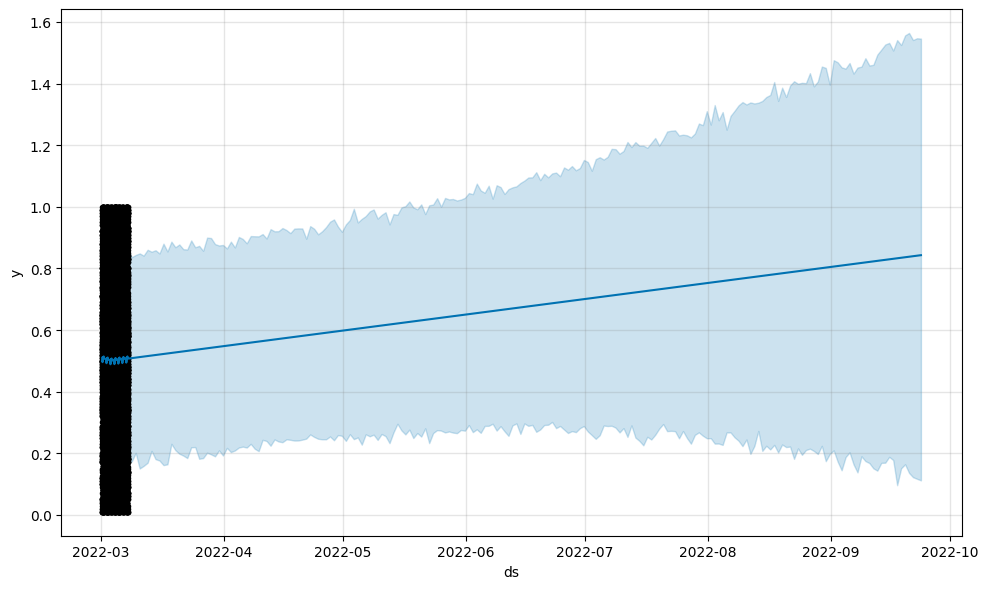

In [20]:
# Plot the combined data
fig1 = m.plot(forecast_full)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

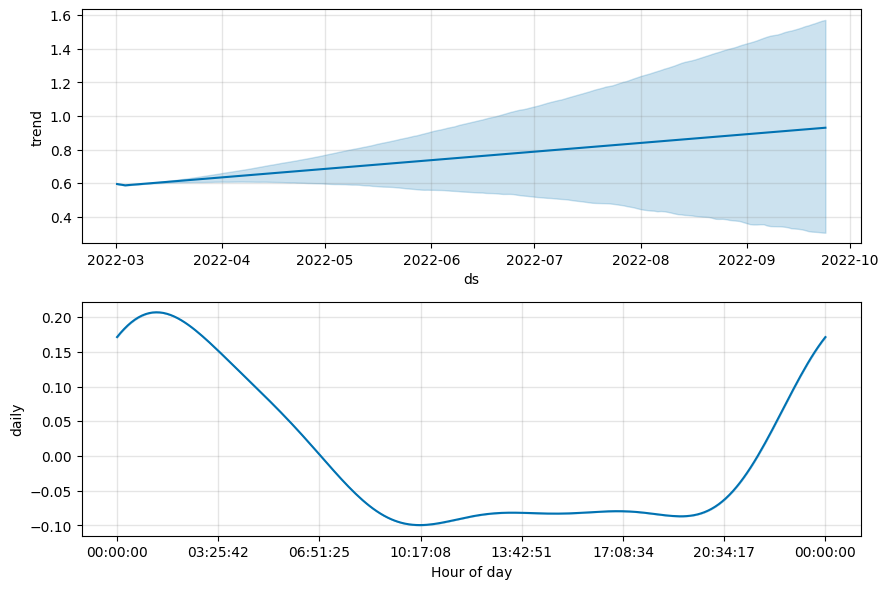

In [21]:
fig2 = m.plot_components(forecast_full)

In [22]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_full)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [23]:
plot_components_plotly(m, forecast_full)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [24]:
import pickle

# Save the trained model as a .pkl file
with open('trained_prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

print("Model saved as trained_prophet_model.pkl")

Model saved as trained_prophet_model.pkl
